In [5]:
pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
warnings.filterwarnings('ignore')


In [15]:
band_path = "Downloads/January"
def read_band(band_path):
    with rasterio.open(band_path) as src:
        return src.read(1).astype(np.float32) / 10000

band_paths = {
    "B2": "Downloads/January/01_03_B02_(Raw).tiff",
    "B4": "Downloads/January/01_03_B04_(Raw).tiff",
    "B8": "Downloads/January/01_03_B08_(Raw).tiff",
    "B11": "Downloads/January/01_03_B11_(Raw).tiff"
}

data = {}
for key, path in band_paths.items():
    try:
        data[key] = read_band(path)
    except Exception as e:
        print(f"Error loading {key}: {e}")

Error loading B2: Downloads/January/01_03_B02_(Raw).tiff: No such file or directory
Error loading B4: Downloads/January/01_03_B04_(Raw).tiff: No such file or directory
Error loading B8: Downloads/January/01_03_B08_(Raw).tiff: No such file or directory
Error loading B11: Downloads/January/01_03_B11_(Raw).tiff: No such file or directory


In [21]:
def safe_divide(numerator, denominator):
    return np.where(denominator == 0, np.nan, numerator / denominator)

ndvi = safe_divide(data["B8"] - data["B4"], data["B8"] + data["B4"])
ndwi = safe_divide(data["B8"] - data["B11"], data["B8"] + data["B11"])
bsi = safe_divide((data["B11"] + data["B4"]) - (data["B8"] + data["B2"]),
(data["B11"] + data["B4"]) + (data["B8"] + data["B2"]))
ioi = safe_divide(data["B4"] - data["B8"], data["B4"] + data["B8"])


print(ndvi)
print(ndwi)
print(bsi)
print(ioi)

KeyError: 'B8'

In [25]:
def plot_heatmap(index, title, cmap):
    plt. figure(figsize = (10,6))
    sns.heatmap(index, cmap=cmap, cbar=True, square=True, xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()

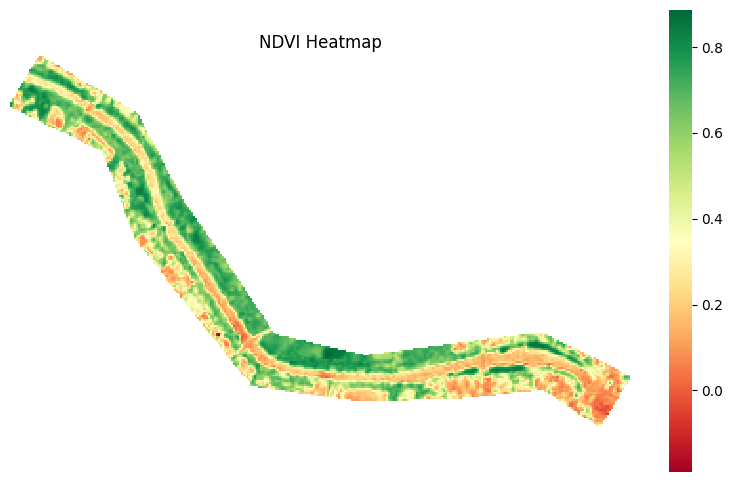

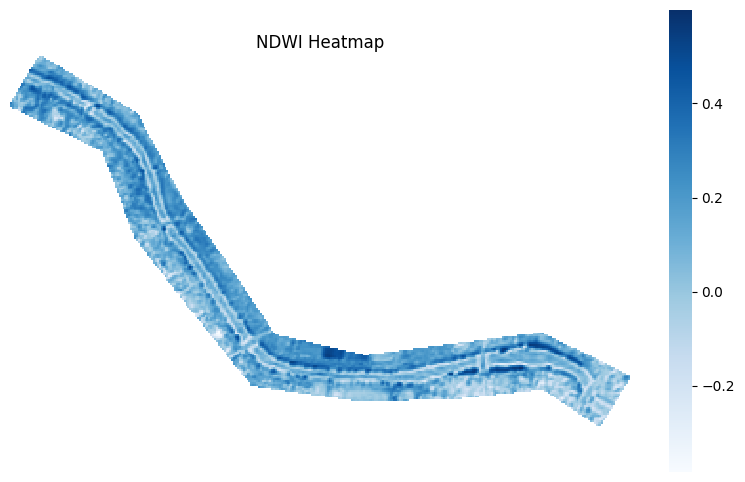

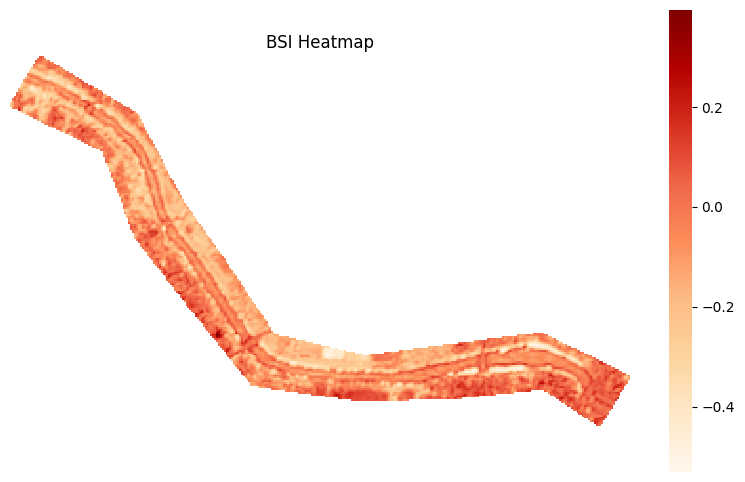

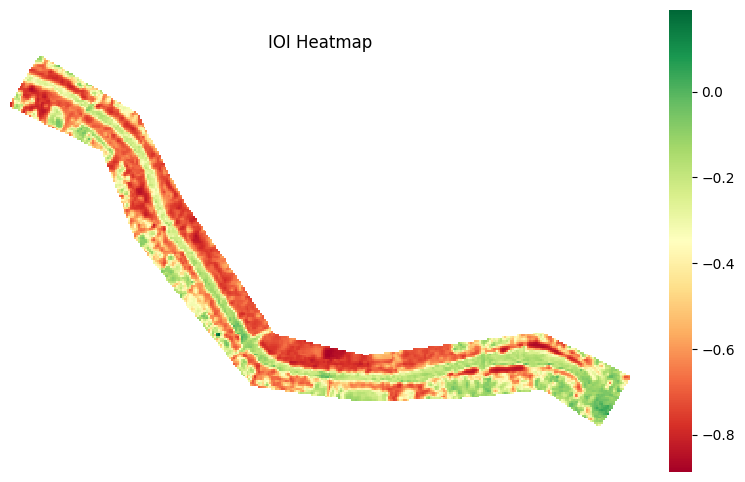

In [26]:
plot_heatmap(ndvi, "NDVI Heatmap", cmap= "RdYlGn")
plot_heatmap(ndwi, "NDWI Heatmap", cmap="Blues")
plot_heatmap(bsi, "BSI Heatmap", cmap="OrRd")
plot_heatmap(ioi, "IOI Heatmap", cmap="RdYlGn")

In [22]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime
import scipy.stats as stats

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to read Sentinel-2 band and return shape
def read_band(band_path):
    with rasterio.open(band_path) as src:
        return src.read(1).astype(np.float32) / 10000  # Normalize

In [10]:
def compute_indices(data):
    # Print keys and shapes for debugging (optional, remove if not needed)
    print("Keys in data:", data.keys())
    for key, arr in data.items():
        print(f"Shape of {key}: {arr.shape}")

    # Check if all arrays have the same shape
    shapes = [arr.shape for arr in data.values()]
    if not all(shape == shapes[0] for shape in shapes):
        raise ValueError(f"Shape mismatch in bands: {shapes}")

    # Compute indices using correct keys
    ndvi = safe_divide(data["B08"] - data["B04"], data["B08"] + data["B04"])
    ndwi = safe_divide(data["B08"] - data["B11"], data["B08"] + data["B11"])
    bsi = safe_divide((data["B11"] + data["B04"]) - (data["B08"] + data["B02"]), 
                      (data["B11"] + data["B04"]) + (data["B08"] + data["B02"]))
    ioi = safe_divide(data["B04"] + data["B08"], data["B04"] - data["B08"])
    return ndvi, ndwi, bsi, ioi

# Safe division
def safe_divide(numerator, denominator):
    return np.where(denominator == 0, np.nan, numerator / denominator)

In [25]:
import os
os.getcwd()

'C:\\Users\\Aatif\\Downloads\\January'

In [26]:
os.chdir("C:\\Users\\Aatif\\Downloads\\January")

In [31]:
# Define dates (month-day) based on your previous output
dates = [
    "3_Jan", "23_Jan",  # January
    "2_Feb", "27_Feb",  # February
    "14_Mar", "31_Mar"   #March
]

# Initialize dictionaries to store index values over time
index_values = {
    "NDVI": [],
    "NDWI": [],
    "BSI": [],
    "IOI": []
}

# Bands to process
bands = ["B02", "B04", "B08", "B11"]

# Process each date
for date in dates:
    band_paths = {band: f"{date}_{band}_(Raw).tiff" for band in bands}  # e.g., "01-03B02_(Raw).tiff"

    data = {}
    # Load bands
    for key, path in band_paths.items():
        if os.path.exists(path):  # Check if file exists
            try:
                data[key] = read_band(path)
                print(f"Loaded {path} with key {key}, shape: {data[key].shape}")
            except Exception as e:
                print(f"Error loading {key} for {date}: {e}")
        else:
            print(f"File not found: {path}")

    # Ensure all bands are loaded and have the same shape
    if len(data) == 4:
        try:
            # Compute indices
            ndvi, ndwi, bsi, ioi = compute_indices(data)

            # Store mean values (ignoring NaN)
            index_values["NDVI"].append(np.nanmean(ndvi))
            index_values["NDWI"].append(np.nanmean(ndwi))
            index_values["BSI"].append(np.nanmean(bsi))
            index_values["IOI"].append(np.nanmean(ioi))
        except (ValueError, KeyError) as e:
            print(f"Error processing {date}: {e}")
    else:
        print(f"Skipping {date}: Not all bands loaded. Loaded {len(data)} out of 4.")

File not found: 3_Jan_B02_(Raw).tiff
File not found: 3_Jan_B04_(Raw).tiff
File not found: 3_Jan_B08_(Raw).tiff
File not found: 3_Jan_B11_(Raw).tiff
Skipping 3_Jan: Not all bands loaded. Loaded 0 out of 4.
Loaded 23_Jan_B02_(Raw).tiff with key B02, shape: (194, 325)
Loaded 23_Jan_B04_(Raw).tiff with key B04, shape: (194, 325)
Loaded 23_Jan_B08_(Raw).tiff with key B08, shape: (194, 325)
Loaded 23_Jan_B11_(Raw).tiff with key B11, shape: (194, 325)
Keys in data: dict_keys(['B02', 'B04', 'B08', 'B11'])
Shape of B02: (194, 325)
Shape of B04: (194, 325)
Shape of B08: (194, 325)
Shape of B11: (194, 325)
Loaded 2_Feb_B02_(Raw).tiff with key B02, shape: (194, 325)
Loaded 2_Feb_B04_(Raw).tiff with key B04, shape: (194, 325)
Loaded 2_Feb_B08_(Raw).tiff with key B08, shape: (194, 325)
Loaded 2_Feb_B11_(Raw).tiff with key B11, shape: (194, 325)
Keys in data: dict_keys(['B02', 'B04', 'B08', 'B11'])
Shape of B02: (194, 325)
Shape of B04: (194, 325)
Shape of B08: (194, 325)
Shape of B11: (194, 325)
Loa

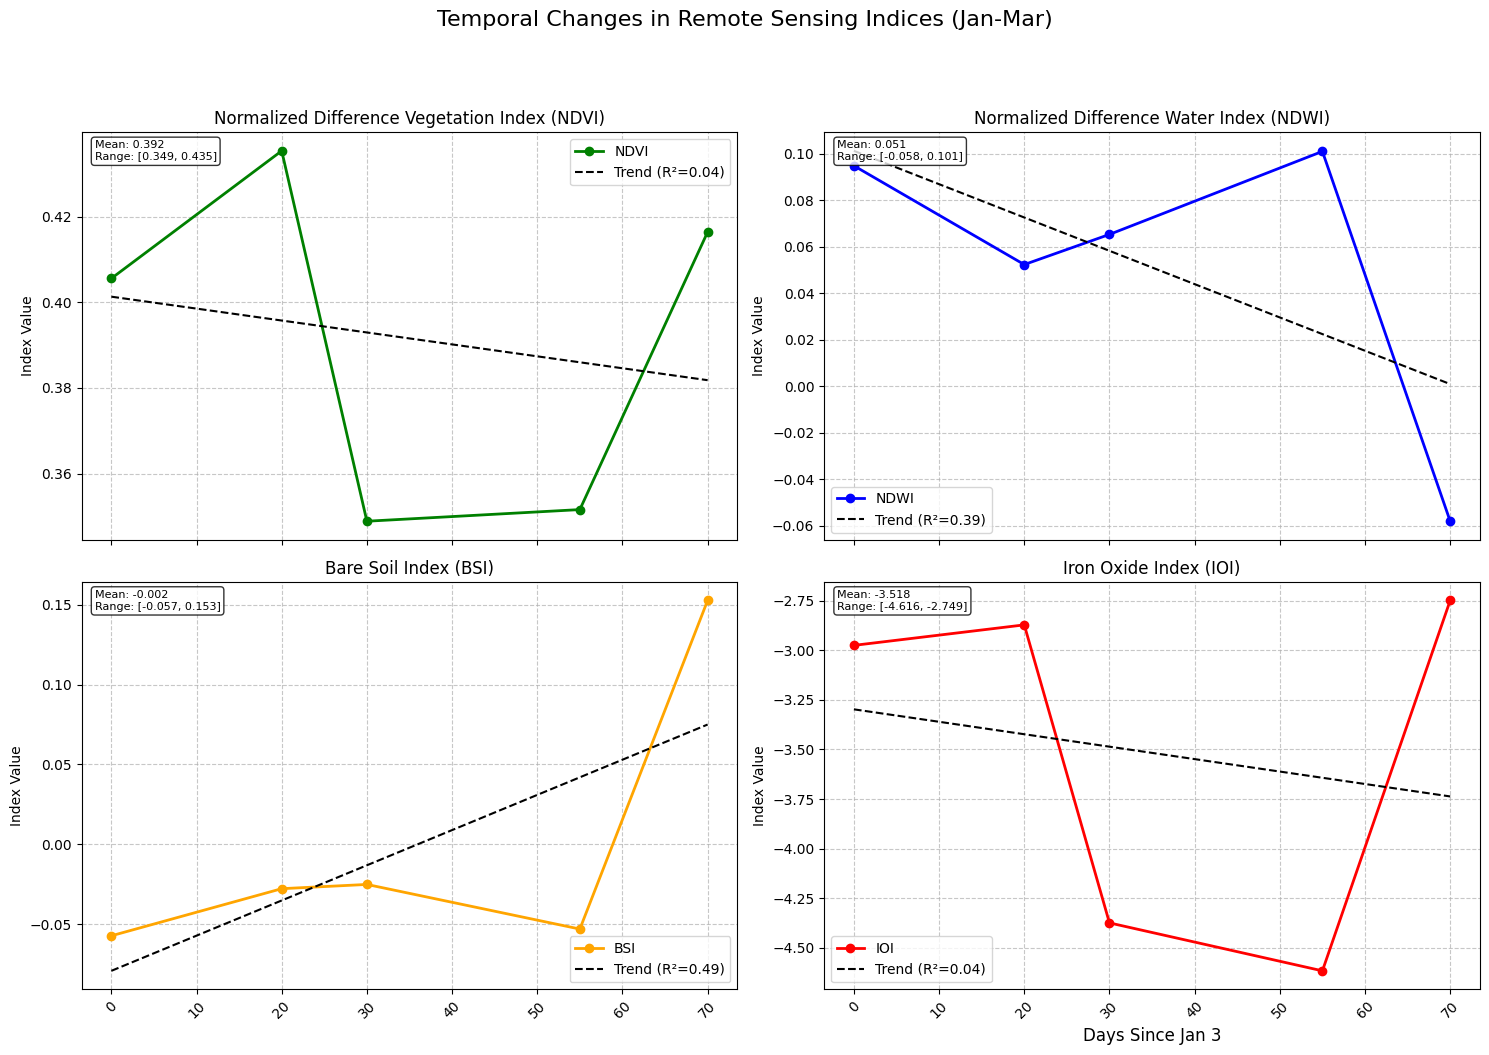

In [33]:
# Convert dates to numerical format for plotting (days since start)
start_date = datetime(2025, 1, 3)
date_nums = [datetime.strptime(d, "%d_%b").replace(year=2025) - start_date for d in dates]
date_nums = [d.days for d in date_nums]

# Create separate plots for each index
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig.suptitle("Temporal Changes in Remote Sensing Indices (Jan-Mar)", fontsize=16, y=1.05)

# Indices and their plots
indices = {
    "NDVI": {"ax": axs[0, 0], "color": "green", "title": "Normalized Difference Vegetation Index (NDVI)"},
    "NDWI": {"ax": axs[0, 1], "color": "blue", "title": "Normalized Difference Water Index (NDWI)"},
    "BSI": {"ax": axs[1, 0], "color": "orange", "title": "Bare Soil Index (BSI)"},
    "IOI": {"ax": axs[1, 1], "color": "red", "title": "Iron Oxide Index (IOI)"}
}

for index_name, params in indices.items():
    ax = params["ax"]
    color = params["color"]
    title = params["title"]

    if index_values[index_name]:  # Only plot if there are values
        # Plot data
        ax.plot(date_nums[:len(index_values[index_name])], index_values[index_name], 
                marker='o', color=color, linewidth=2, label=index_name)

        # Fit a linear trend line
        slope, intercept, r_value, p_value, std_err = stats.linregress(date_nums[:len(index_values[index_name])], 
                                                                      index_values[index_name])
        trend_line = [slope * x + intercept for x in date_nums[:len(index_values[index_name])]]
        ax.plot(date_nums[:len(index_values[index_name])], trend_line, color='k', linestyle='--', 
                label=f'Trend (R²={r_value**2:.2f})')

        # Customize each subplot
        ax.set_title(title, fontsize=12)
        ax.set_ylabel("Index Value", fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
        ax.tick_params(axis='x', rotation=45)

        # Add mean and range as text
        mean_val = np.nanmean(index_values[index_name])
        min_val, max_val = np.nanmin(index_values[index_name]), np.nanmax(index_values[index_name])
        ax.text(0.02, 0.98, f'Mean: {mean_val:.3f}\nRange: [{min_val:.3f}, {max_val:.3f}]', 
                transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Set common x-label
plt.xlabel("Days Since Jan 3", fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [34]:
# Optional: Print summary
print("\nSummary of Index Changes:")
for index_name, values in index_values.items():
    if values:  # Check if there are any values
        print(f"{index_name}: Start = {values[0]:.4f}, End = {values[-1]:.4f}, Change = {values[-1] - values[0]:.4f}, Mean = {np.nanmean(values):.4f}")
    else:
        print(f"{index_name}: No data available")


Summary of Index Changes:
NDVI: Start = 0.4056, End = 0.4164, Change = 0.0108, Mean = 0.3916
NDWI: Start = 0.0948, End = -0.0580, Change = -0.1528, Mean = 0.0510
BSI: Start = -0.0573, End = 0.1526, Change = 0.2099, Mean = -0.0021
IOI: Start = -2.9756, End = -2.7493, Change = 0.2263, Mean = -3.5175
